# **20230616**

## 13장 모델 성능 검증하기

### 01 데이터의 확인과 예측 실행

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sonar3.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [4]:
# 이진분류
df[60].value_counts()

60
1    111
0     97
Name: count, dtype: int64

In [5]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

#### 실습 | 초음파 광물 예측하기 : 데이터 확인과 실행

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5048
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5913
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5769
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6202
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6779
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6587
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.7019
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6827
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7404
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.6923
Epoch 11/

### 02 과적합 이해하기


피쳐수가 많고 데이터의 총량은 적은 경우 벡터 스페이스 내 설명할 수 없는 빈 공간이 너무 많은 상태 <br> => 해당 벡터들을 제대로 설명하는 학습 모델 만들기 힘듬  <br> => 과적합 모델 생성됨

=> 차원 축소를 통해 빈 공간을 줄이고 학습 하는 것을 추천


- 신경망의 층이 너무 많은 경우에도 과적합 발생 (=트리 계열의 maxdepth) 

### **03 학습셋과 테스트셋**

- 학습셋과 테스트셋으로 은닉층 개수에 따른 과적합 확인

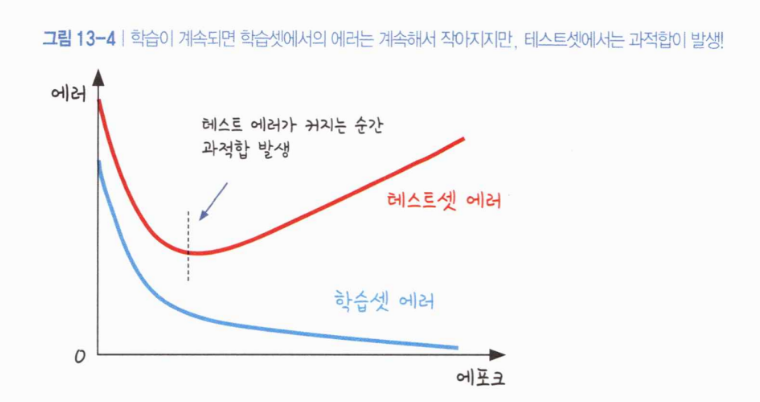

In [10]:
from IPython.display import Image
Image('./ch13_학습테스트.png')

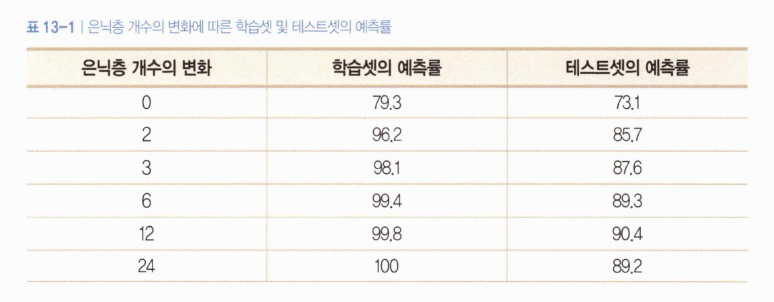

In [11]:
Image('./ch13_은닉층_학습테스트.png')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True)

In [14]:
score = model.evaluate(X_test,y_test)
print('Test accuary: ',score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 1.0000
Test accuary:  1.0


#### 실습 | 초음파 광물 예측하기 : 학습셋과 테스트셋 구분

In [15]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

# 학습 셋과 테스트 셋을 구분합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)


# 모델을 설정합니다.
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=200, batch_size=10)


# 모델을 테스트셋에 적용해 정확도를 구합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 0.6947 - accuracy: 0.5034
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.5517
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5655
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.6483
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.7103
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.7034
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.7448
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6045 - accuracy: 0.7310
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7724
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7172
Epoch 11/

### **04 모델 저장과 재사용**

In [16]:
model.save('../data/model/my_model.hdf5')

In [17]:
from tensorflow.keras.models import Sequential, load_model

In [18]:
del model

In [19]:
model = load_model('../data/model/my_model.hdf5')

In [20]:
score = model.evaluate(X_test, y_test)
print('Test accuracy : ',score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.8038 - accuracy: 0.8571
Test accuracy :  0.8571428656578064


In [21]:
score
# [loss, accuracy]

[0.803828775882721, 0.8571428656578064]

### **05 k겹 교차 검증**

In [22]:
from sklearn.model_selection import KFold

k=5
kfold = KFold(n_splits=k, shuffle=True)
acc_score=[]

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]

In [23]:
accuracy = model.evaluate(X_test, y_test)[1]
acc_score.append(accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.9024


#### 실습 | 초음파 광물 예측하기 : k겹 교차 검증

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


import pandas as pd


# 데이터를 입력합니다.
df = pd.read_csv('../data/sonar3.csv', header=None)


# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [26]:
#몇 겹으로 나눌 것인지를 정합니다.
k=5


#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)


#정확도가 채워질 빈 리스트를 준비합니다.
acc_score = []


def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model


#K겹 교차 검증을 이용해 k번의 학습을 실행합니다.
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]


    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0)
   
    accuracy = model.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.


#k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k


#결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

2/2 [==============================] - 0s 3ms/step - loss: 1.4266 - accuracy: 0.8049
정확도: [0.8095238208770752, 0.8095238208770752, 0.8571428656578064, 0.8292682766914368, 0.8048780560493469]
정확도 평균: 0.8220673680305481
